In [1]:
!pip uninstall -y keras-nightly
!pip uninstall -y tensorflow

!pip uninstall tensorflow keras tensorflow-gpu -y
!pip install --upgrade --ignore-installed tensorflow-gpu==1.14.0 keras==2.2.4
!pip install h5py==2.10.0 mapcalc

Uninstalling keras-nightly-2.5.0.dev2021032900:
  Successfully uninstalled keras-nightly-2.5.0.dev2021032900
Uninstalling tensorflow-2.5.0:
  Successfully uninstalled tensorflow-2.5.0
Uninstalling Keras-2.4.3:
  Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 377.1MB 49kB/s 
     |████████████████████████████████| 317kB 44.7MB/s 
     |████████████████████████████████| 1.0MB 47.6MB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
     |████████████████████████████████| 61kB 11.3MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
     |████████████████████████████████| 491kB 49.2MB/s 
     |████████████████████████████████| 3.2MB 47.8MB/s 
     |████████████████████████████████| 15.7MB 183kB/s 
     |████████████████████████████████| 4.2MB 44.1MB/s 
     |████████████████████████████████| 133kB 58.0MB/s 
     |████████████████████████████████| 28.5MB 110kB/s 
     |████████████████████████████████| 645kB 52.1MB/s 
     |██████████████████████

     |████████████████████████████████| 2.9MB 7.8MB/s 
  Found existing installation: h5py 3.3.0
    Uninstalling h5py-3.3.0:
      Successfully uninstalled h5py-3.3.0


In [2]:
import tensorflow as tf

print(tf.__version__)

import keras

print(keras.__version__)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0
2.2.4


/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [3]:
# !rm -rf document-data-extractor

In [4]:
!git clone https://github.com/adesgautam/document-data-extractor.git

Cloning into 'document-data-extractor'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 135 (delta 19), reused 133 (delta 17), pack-reused 0
Receiving objects: 100% (135/135), 20.00 MiB | 27.31 MiB/s, done.
Resolving deltas: 100% (19/19), done.


# Download Darknet Weights


In [3]:
import os
import subprocess
import time
import requests
import progressbar

base_path = "document-data-extractor/"
yolo3_weights = base_path + 'models/yolov3.weights'

# Set URL
url = 'https://pjreddie.com/media/files/yolov3.weights'
r = requests.get(url,stream=True)

# Download yolo weights
f = open(yolo3_weights, 'wb')
file_size = int(r.headers.get('content-length'))
chunk = 100
num_bars = file_size // chunk
bar =  progressbar.ProgressBar(maxval=num_bars).start()
i = 0
for chunk in r.iter_content(chunk):
    f.write(chunk)
    bar.update(i)
    i+=1
f.close()

 99% (2478252 of 2480070) |############# | Elapsed Time: 0:00:40 ETA:   0:00:00

# Convert Darknet weights into Keras h5 format


In [4]:
# Call for weights conversion
convert_file = base_path + 'keras_yolo3/convert.py'
yolo_config  = base_path + 'models/yolov3.cfg'
yolo_weights = base_path + 'models/yolov3.weights'
yolo_h5      = base_path + 'models/yolo.h5'

# Call subprocess for conversion from yolov3.weights to yolo.h5
call_string = 'python ' +convert_file+ ' ' +yolo_config+ ' ' +yolo_weights+ ' ' + yolo_h5
print("Calling subprocess:", call_string)
subprocess.call(call_string , shell=True)#, cwd = base_path)

Calling subprocess: python document-data-extractor/keras_yolo3/convert.py document-data-extractor/models/yolov3.cfg document-data-extractor/models/yolov3.weights document-data-extractor/models/yolo.h5


0

# Compile Model

In [5]:
import os
import numpy as np
import pickle
import keras.backend as K

from PIL import Image
from time import time
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import sys
sys.path.append('document-data-extractor')

from keras_yolo3.yolo3.model import preprocess_true_boxes, yolo_body, yolo_loss
from keras_yolo3.yolo3.utils import get_random_data
from train_utils import get_classes, get_anchors, create_model, data_generator, data_generator_wrapper, ChangeToOtherMachine

import keras.backend as K
K.clear_session()

# Setup directories and filenames
YOLO_train_file = base_path + 'images/train.txt'
classes_file = base_path + 'data_classes.txt'
log_dir = base_path + 'model_logs'
anchors_path = base_path + 'yolo_anchors.txt'
weights_path = base_path + 'models/yolo.h5'

if not os.path.exists(log_dir):
    os.mkdir(log_dir)

## Hyperparameters
# multiple of 32, height, width
input_shape = (416, 416)
test_split = 0.2
random_seed = 0

## Checkpoint settings
save_best_model_only = True
model_save_per_epochs = 1

# Set random seed
np.random.seed(random_seed)

class_names = get_classes(classes_file)
num_classes = len(class_names)
anchors = get_anchors(anchors_path)

model = create_model(input_shape, anchors, num_classes, freeze_body=2, weights_path = weights_path) 

# Setup logging
log_dir_time = os.path.join(log_dir,'{}'.format(int(time())))
logging = TensorBoard(log_dir = log_dir_time)

# Create callbacks
# _{epoch:02d}_{val_loss:.2f}
checkpoint = ModelCheckpoint(os.path.join(log_dir,'checkpoint.h5'),
                                            monitor = 'val_loss', 
                                            save_weights_only = True, 
                                            save_best_only = save_best_model_only, 
                                            period = model_save_per_epochs)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

## Read training data
with open(YOLO_train_file) as f:
    lines = f.read()

lines = lines.split('\n')

## Split Train and Test data
np.random.shuffle(lines)
num_test = int(len(lines)*test_split)
num_train = len(lines) - num_test

lr1 = 1e-3
model.compile(optimizer=Adam(lr=lr1), loss={'yolo_loss': lambda y_true, y_pred: y_pred})








Create YOLOv3 model with 9 anchors and 1 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((1, 1, 1024, 18) vs (255, 1024, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((18,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((1, 1, 512, 18) vs (255, 512, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((18,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_75 due to mismatch in shape ((1,

Load weights document-data-extractor/models/yolo.h5.
Freeze the first 249 layers of total 252 layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



# Train Model

In [6]:
## Hyperparams
batch_size = 16
epochs = 60

# Train with frozen layers first, to get a stable loss.
## Train Stage 1 (for making a stable model first)

print('Training on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_test, batch_size))
history = model.fit_generator(
                        data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                        steps_per_epoch=max(1, num_train//batch_size),
                        validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                        validation_steps=max(1, num_test//batch_size),
                        epochs=epochs,
                        initial_epoch=0,
                        callbacks=[logging, checkpoint]
                        )

# Save stage 1 model by with loss in filename
step1_train_loss = history.history['loss']
step1_val_loss = history.history['val_loss']

last_train_loss = step1_train_loss[-2] if step1_train_loss[-1]=='' else step1_train_loss[-1]
last_val_loss = step1_val_loss[-2] if step1_val_loss[-1]=='' else step1_val_loss[-1]

# Save stage 1 model
model.save_weights(os.path.join(log_dir,'trained_weights_stage_1_trainloss_'+ 
                                        str(last_train_loss) + '_valloss_' + str(last_val_loss) + '.h5'))

Training on 48 samples, val on 12 samples, with batch size 16.


Epoch 1/60
3/3 [==============================] - 18s 6s/step - loss: 8751.7381 - val_loss: 7112.9556
Epoch 2/60
3/3 [==============================] - 2s 531ms/step - loss: 6186.7183 - val_loss: 4960.8296
Epoch 3/60
3/3 [==============================] - 2s 505ms/step - loss: 4320.3560 - val_loss: 3594.1208
Epoch 4/60
3/3 [==============================] - 2s 524ms/step - loss: 3032.5292 - val_loss: 2427.3396
Epoch 5/60
3/3 [==============================] - 6s 2s/step - loss: 2164.6762 - val_loss: 1759.3439
Epoch 6/60
3/3 [==============================] - 8s 3s/step - loss: 1575.9462 - val_loss: 1256.0089
Epoch 7/60
3/3 [==============================] - 8s 3s/step - loss: 1213.2484 - val_loss: 990.5573
Epoch 8/60
3/3 [==============================] - 7s 2s/step - loss: 905.8228 - val_loss: 730.8362
Epoch 9/60
3/3 [==============================] - 7s 2s/step - loss: 735.7866 - val_loss: 660.6887
Epoch 10/60
3/3 [====

# Fine Tuning Model

In [7]:
## Fine tuning settings
fine_tune = True
ft_batch_size = 4
lr2 = 1e-4
ft_epochs = epochs+epochs

## Fine tune the stage 1 model    
# Unfreeze and continue training, to fine-tune.
# Train longer if the result is unsatisfactory.
if fine_tune:
    for i in range(len(model.layers)):
        model.layers[i].trainable = True
    model.compile(optimizer=Adam(lr=lr2), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) 
    print('Unfreezing all layers...')

    batch_size = ft_batch_size # note that more GPU memory is required after unfreezing the body
    print('Training on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_test, batch_size))
    history = model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                                steps_per_epoch=max(1, num_train//batch_size),
                                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                                validation_steps=max(1, num_test//batch_size),
                                epochs=ft_epochs,
                                initial_epoch=epochs,
                                callbacks=[logging, checkpoint, reduce_lr, early_stopping])

    # Save fine tuned model by with loss in filename
    step2_train_loss = history.history['loss']
    step2_val_loss = history.history['val_loss']

    last_train_loss = step2_train_loss[-2] if step2_train_loss[-1]=='' else step2_train_loss[-1]
    last_val_loss = step2_val_loss[-2] if step2_val_loss[-1]=='' else step2_val_loss[-1]

    # Save fine tuned model
    model.save_weights(os.path.join(log_dir,'trained_weights_final_finetuned_'+ 
                                            str(last_train_loss) + '_valloss_' + str(last_val_loss) + '.h5'))

Unfreezing all layers...
Training on 48 samples, val on 12 samples, with batch size 4.
Epoch 61/120
12/12 [==============================] - 24s 2s/step - loss: 38.4231 - val_loss: 44.7402
Epoch 62/120
12/12 [==============================] - 5s 441ms/step - loss: 26.0708 - val_loss: 29.7917
Epoch 63/120
12/12 [==============================] - 7s 553ms/step - loss: 22.6689 - val_loss: 34.3452
Epoch 64/120
12/12 [==============================] - 9s 743ms/step - loss: 25.2006 - val_loss: 22.3684
Epoch 65/120
12/12 [==============================] - 8s 708ms/step - loss: 20.2682 - val_loss: 20.9345
Epoch 66/120
12/12 [==============================] - 8s 693ms/step - loss: 19.5355 - val_loss: 19.9546
Epoch 67/120
12/12 [==============================] - 8s 683ms/step - loss: 19.1393 - val_loss: 19.4754
Epoch 68/120
12/12 [==============================] - 8s 704ms/step - loss: 17.7102 - val_loss: 16.4469
Epoch 69/120
12/12 [==============================] - 8s 687ms/step - loss: 16.7707

# Visualize predictions

### Download weights from https://drive.google.com/file/d/1Sffj0ePwM5aaIkFGO594KOF-en0GikdD/view?usp=sharing
### And put in model_logs folder

In [11]:
import pandas as pd
import numpy as np
import random
import keras.backend as K

from timeit import default_timer as timer
from keras_yolo3.yolo import YOLO, detect_video
from utils import load_extractor_model, load_features, parse_input, detect_object
from get_file_paths import GetFileList

print("Starting...")
K.clear_session()

#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

input_path = "test"
output_path = "test"

if not os.path.exists(output_path):
    os.mkdir(output_path)

anchors_path = base_path + "yolo_anchors.txt"
classes_path = base_path + "data_classes.txt"
## This is the pretrained weight file from drive
model_path = base_path + "model_logs/trained_weights_final_finetuned_15.321455319722494_valloss_16.46542962392171.h5"

score = 0.25
gpu_num = 1
postfix = "_text"
save_img = True

print("Loading Model...")
# Define YOLO detector
yolo = YOLO(**{"model_path": model_path,
                "anchors_path": anchors_path,
                "classes_path": classes_path,
                "score" : score,
                "gpu_num" : gpu_num,
                "model_image_size" : (416, 416),
                })
print("Model Loaded!")

# Labels to draw on images
class_file = open(classes_path, 'r')
input_labels = [line.rstrip('\n') for line in class_file.readlines()]
print('Found {} input labels: {} ...'.format(len(input_labels), input_labels))

def predict_image(img_path):
    print(img_path)

    # Make a dataframe for the prediction outputs
    out_df = pd.DataFrame(columns=['image', 'image_path','xmin', 'ymin', 'xmax', 'ymax', 'label','confidence','x_size','y_size'])

    prediction, image = detect_object(yolo, img_path, save_img = save_img,
                                        save_img_path = output_path,
                                        postfix=postfix) 

    y_size, x_size, _ = np.array(image).shape
    cols = ['image','image_path', 'xmin', 'ymin', 'xmax', 'ymax', 'label','confidence','x_size','y_size']
    for single_prediction in prediction:
        out_df = out_df.append(pd.DataFrame([[os.path.basename(img_path.rstrip('\n')),
                                              img_path.rstrip('\n')]+single_prediction + [x_size,y_size]], 
                                            columns=cols))
    return out_df

Starting...
Loading Model...
document-data-extractor/model_logs/trained_weights_final_finetuned_15.321455319722494_valloss_16.46542962392171.h5 model, anchors, and classes loaded in 10.31sec.
Model Loaded!
Found 1 input labels: ['issuer'] ...


In [7]:
val_data = []
base_path = 'document-data-extractor/'
with open(base_path+'images/val.txt', 'r') as f:
    val_data = f.read().split('\n')

train_data = []
with open(base_path+'images/train.txt', 'r') as f:
    train_data = f.read().split('\n')

document-data-extractor/images/33.jpg
document-data-extractor/images/33.jpg
img_path document-data-extractor/images/33.jpg
(416, 416, 3)
Found 1 boxes for img
issuer 0.69 (103, 199) (573, 358)
Time spent: 0.102sec


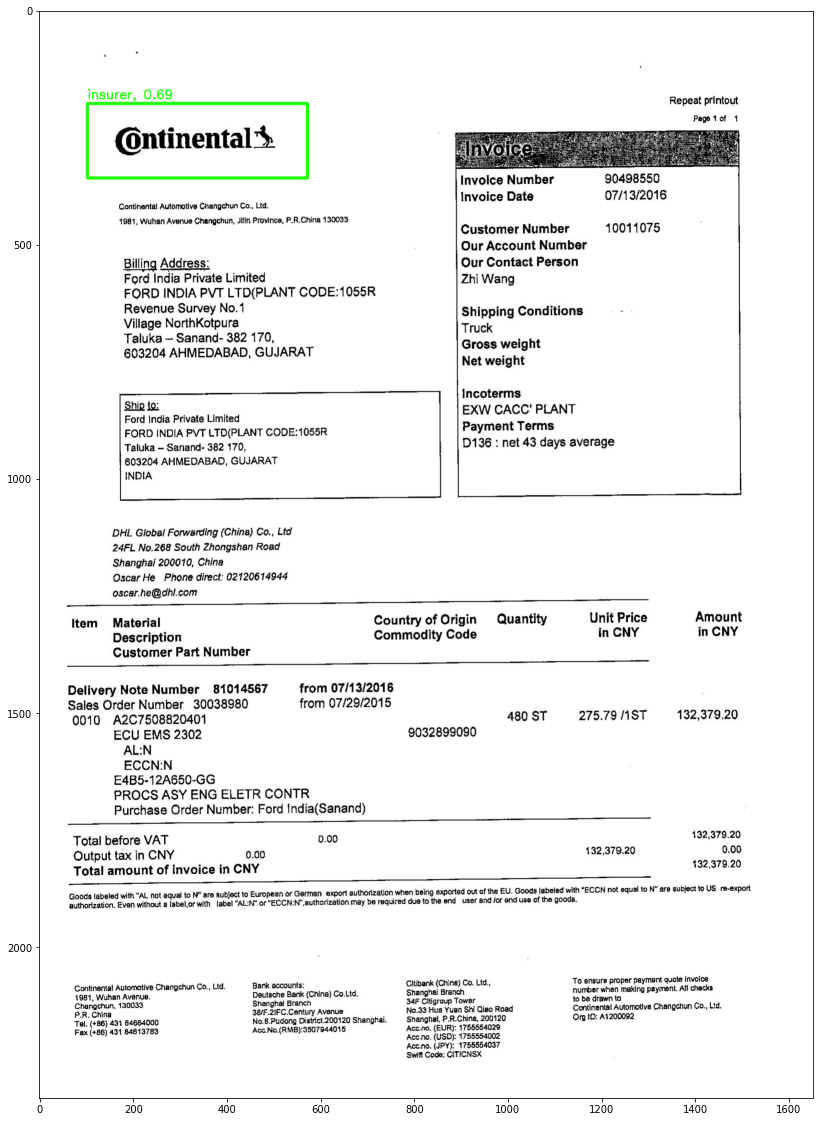

In [24]:
import cv2 
import matplotlib.pyplot as plt

int_to_label = {0:'insurer'}

index = 4
image_path = val_data[index].split(' ')[0]
print(image_path)
print(out_df)

out_df = predict_image(image_path)

image = cv2.imread(image_path)

for row in out_df.iterrows():
    row = row[1]

    x1 = row[2]
    y1 = row[3]
    x2 = row[4]# - row[2]
    y2 = row[5]# - row[3]

    conf = round(row[7], 2)
    label = int_to_label[row[6]] + ', ' + str(conf)
    
    image = cv2.rectangle(image, (x1, y1), (x2, y2), (36,255,12), 5)
    cv2.putText(image, str(label), (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

plt.figure(figsize=(20,20))
plt.imshow(image)

In [5]:
!pip install pytesseract
!apt install tesseract-ocr
!apt install libtesseract-dev

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14071 sha256=4061e0154e463e1e4d422fb9541a9aa1476300b8e9af76aa33c5f80de2c17101
  Stored in directory: /root/.cache/pip/wheels/a2/66/45/88bf1b2d428817a006944b9730b27d6861b776e05a9e262bd4
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http:/

In [26]:
out_df

,image,image_path,xmin,ymin,xmax,ymax,label,confidence,x_size,y_size
0,33.jpg,document-data-extractor/images/33.jpg,103,199,573,358,0,0.692297,1653,2322


In [54]:
import pytesseract
from pytesseract import Output

image = cv2.imread(image_path)

xmin = out_df.iloc[0]['xmin']
ymin = out_df.iloc[0]['ymin']
xmax = out_df.iloc[0]['xmax']
ymax = out_df.iloc[0]['ymax']
print(xmin,xmax, ymin,ymax)
cropped_insurer_img = image[ymin:ymax, xmin:xmax ]

insurer_text = pytesseract.image_to_string(cropped_insurer_img)
insurer_text

103 573 199 358


'Q@ntinental>\n\x0c'

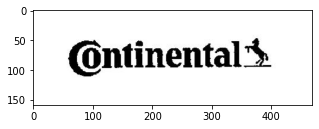

In [151]:
plt.figure(figsize=(5,5))
plt.imshow(cropped_insurer_img)

## Extracting Invoice Date, Number and Total Amount

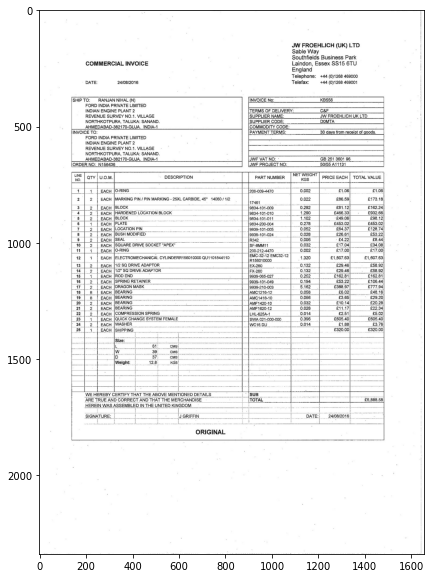

In [150]:
plt.figure(figsize=(10,10))
plt.imshow(image)

In [45]:
## As frequently the Invoice Date, Number comes at the top of the page
## We can do OCR on the particular region

In [20]:
import cv2 
import matplotlib.pyplot as plt
import pytesseract
from pytesseract import Output

index = 6
image_path = train_data[index].split(' ')[0]
image = cv2.imread(image_path)

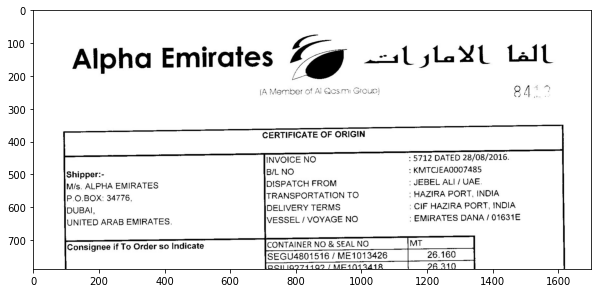

In [21]:
top_image = image[0:image.shape[0]//3,:]

plt.figure(figsize=(10,10))
plt.imshow(top_image)

In [22]:
text_data = pytesseract.image_to_data(top_image, output_type=Output.DICT)
text_data.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

In [24]:
invoice_indexes = []

for i, txt in enumerate(text_data['text']):
    if 'invoice' in txt.lower():
        invoice_indexes.append(i)

Where the invoice keyword is found we can get an image patch around it to get the invoice number and date too. This can work in most conditions.

For date, multiple date patterns could be utilized for regex on the top 1/3 of the image. In most cases the date is at the top.

512 246 1700 665


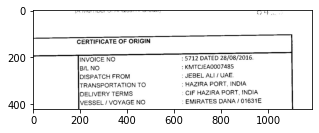

In [25]:
txt_range = 200

invoice_crops = []
for invoice_ind in invoice_indexes:
    x1 = max(text_data['left'][invoice_ind] - txt_range, 0)
    y1 = max(text_data['top'][invoice_ind] - txt_range, 0)
#     x2 = text_data['width'][invoice_ind] + text_data['left'][invoice_ind] + image.shape[1]
    x2 = image.shape[1]
    y2 = text_data['height'][invoice_ind] + text_data['top'][invoice_ind] + txt_range

    print(x1, y1, x2, y2)

    invoice_crop = image[y1:y2, x1:x2]
    invoice_crops.append(invoice_crop)

    plt.figure(figsize=(5,5))
    plt.imshow(invoice_crop)

In [26]:
texts = []
for invoice_crop in invoice_crops:
    text = pytesseract.image_to_string(invoice_crop)
    texts.append(text)

In [28]:
import re

date_patterns = ['\d{2}[\/\.\-][[\d{2}\w]+[\/\.\-]\d{4}', 
                 '\d{4}[\/\.\-][[\d{2}\w]+[\/\.\-]\d{2}']
dates = []

for text in texts:
    for pattern in date_patterns:    
        date = re.findall(pattern, text)
        if date!=[]: 
            dates+=date
            break

print('Date', set(dates))

Date [['28/08/2016']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Possible nested set at position 14
  if __name__ == '__main__':


## Invoice Number

612 346 1700 565
CERTIFICATE OF ORIGIN

  

INVOICE NO
B/L NO
DISPATCH FROM

TF ARIOCDADTATIONI TH

  

   
   

 

 

+5712 DATED 28/08/2016.
: KMTCJEA0007485

: JEBEL ALI / UAE.
-WAZTIRA PORT INDIA



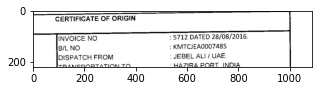

In [30]:
for invoice_ind in invoice_indexes:
    txt_range = 100

    x1 = max(text_data['left'][invoice_ind] - txt_range, 0)
    y1 = max(text_data['top'][invoice_ind] - txt_range, 0)
    # x2 = text_data['width'][invoice_ind] + text_data['left'][invoice_ind] + txt_range + 200
    x2 = image.shape[1]
    y2 = text_data['height'][invoice_ind] + text_data['top'][invoice_ind] + txt_range

    print(x1, y1, x2, y2)

    invoice_crop = image[y1:y2, x1:x2]
    invoice_crops.append(invoice_crop)

    plt.figure(figsize=(5,5))
    plt.imshow(invoice_crop)

    text = pytesseract.image_to_string(invoice_crop)
#     print(text)
    text = text.split('\n')
    for i, txt in enumerate(text):
        if 'invoice' in txt.lower():
            print('###############\n', text[i:i+10])
            break


## Amount

In [ ]:
## Find Amount/Total keywords
amount_indexes = []

for i, txt in enumerate(text_data['text']):
    if 'total' in txt.lower() or 'amount' in txt.lower():
        amount_indexes.append(i)
        
txt_range = 200

amount_crops = []
for amount_ind in amount_indexes:
    x1 = max(text_data['left'][amount_ind] - txt_range, 0)
    y1 = max(text_data['top'][amount_ind] - txt_range, 0)
#     x2 = text_data['width'][invoice_ind] + text_data['left'][invoice_ind] + image.shape[1]
    x2 = image.shape[1]
    y2 = text_data['height'][amount_ind] + text_data['top'][amount_ind] + txt_range
    print(x1, y1, x2, y2)

    amount_crop = image[y1:y2, x1:x2]
    amount_crops.append(amount_crop)

    plt.figure(figsize=(5,5))
    plt.imshow(amount_crop)
    
texts = []
for amount_crop in amount_crops:
    text = pytesseract.image_to_string(amount_crop)
#     texts.append(text)
    print(text)
    
    amount_patterns = ['\d+[,.]\d+']
    amount = []
    for pattern in amount_patterns:    
        amnt = re.findall(pattern, text)
        if amnt!=[]: 
            amount+=amnt
            break
    print(amount)

    amounts = [int(i.replace(',','').replace('.','')) for i in amount]
    if amounts!=[]:
        final_amount = max(amounts)
        print(final_amount)